# &#128204; Intro Of This Notebook
The aim of this study is to diagnose epileptic seizures by using different machine learning algorithms. For this purpose, the frequency components of the EEG are extracted by using the discrete wavelet transform (DWT) and parametric  methods based on autoregressive (AR) model. Both these two feature extraction methods are applied to the input of machine learning classification algorithms such as Artificial Neural Networks (ANN), Naive Bayesian, k-Nearest Neighbor (k-NN), Support Vector Machines (SVM), Logistic Regression,Principal Component Analysis. The results show that k-NN, ANN and SVM were the most efficient method according to test processing of both DWT and AR as feature extraction for recognition of epileptic seizures in EEG.

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d|ice|');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #818286; font-family: 'Roboto';}
span {font-family:'Roboto'; color:black; text-shadow: 5px 5px 5px #aaa;}  
div.output_area pre{font-family:'Roboto'; font-size:110%; color:lightblue;}      
</style>

# &#128225; Introduction Of Epileptic
Epilepsy is a serious brain illness that is an endemic neurological disorder all over  the world. It is a clinical result that occurs with abnormal neurological electrical  discharging of brain. Epileptic seizures represent the most common positive signs and  symptoms of brain disturbance, and epilepsy is one of the most common primary  brain disorders . Vascular causes, traumatic causes, infections and brain abscesses,  brain tumors, nutritional deficiencies, pyridoxine deficiency, calcium metabolism  disorders are lead causes for epilepsy. For in diagnosing epilepsy, research is needed  for better understanding of mechanisms causing epileptic disorders. The evaluation  and treatment of neurophysiologic disorders are diagnosed with the  electroencephalogram [EEG]. EEG is crucial for accurate classification of different  forms of epilepsy .

# Theoretical Background
The aim of this study is to contribute to the diagnosis of epilepsy by taking advantage of the engineering. So, for diagnosing of epileptic seizures from EEG signals are transformed discrete wavelet and auto regressive models. After these transformations, extract data is applied input for Back-propagation, Naive Bayesian, k-Nearest Neighbor (k-NN), Support Vector Machines (SVM) ,ANN ,Logistic Regression and Principal Component Analysis algorithms.

# EEG Data Recording
EEG signals are separated into α, β, δ and θ spectral components and provide a  wide range of frequency components. EEG spectrum contains some characteristic  waveforms that fall primarily within four frequency bands as follows: δ(0.5-4 Hz),  θ(4-8 Hz), α(8-13 Hz), and β (13- 30 Hz) .
EEG data set has acquired different age groups in this study. They are known  epileptic with uncontrolled seizures and are admitted to the neurology department of the Medical Faculty Hospital of Dicle University1. For this system LabView pro-  gramming language has been used  and the EEG data used in 400 people who re-  ceived 200 of them are epilepsy and with 200 of them are normal. Data set represents  of signals belong to several healthy and epileptic patients. The EEG signals that are  contained by PCI-MIO 16E DAQ card system that provides real time processing and  is a data bus of computer, signal processor and personal computer. Fig. 2 shows that  how to acquire EEG data from a patient [1]. EEG signals are to ensure the accuracy of  diagnosing disease that usually is taken 8-10 hours in the form of records. EEG sig-  nals are used in section and 23.6 seconds, 173 Hz sampling frequency is illustrated  with. International 10–20 electrode placement system according to the data collected,  12-bit analog-digital conversion after the samples are recorded subsequently. Data can  be passed through the filter 0.53–40 Hz band–pass, the EEG in the presence of clini-  cal interest for focusing range is provided. The EEG data used in our study were  downloaded from 24-h EEG recorded from both epileptic patients and normal sub-  jects. The following bipolar EEG channels were selected for analysis: F7-C3, F8-C4,  T5-O1 and T6-O2. In order to assess the performance of the classifier, we selected  500 EEG segments containing spike and wave complex, artifacts and background  normal EEG .
![Imgur](https://i.imgur.com/6rQgYS9.png)

# Discrete Wavelet Transform
Wavelet transform is more advantageous spectral analyze method than other  spectral analyze methods on non-stationary signals. Because the wavelet transform  method changes large low-frequency, high frequency that is narrow for the window  size. So, the entire frequency range can be achieved in the optimum time-frequency  resolution [22] Continuous and discrete wavelet transform is analyzed in the scale and  variation of parameters due to the continuous wavelet coefficients for each scale is  difficult and time consuming. For this reason, discrete wavelet transform is used more
ften than these non-stationary signals. Wavelet scale is divided into a number of  points for x[n] process as seen in Fig. 2 that is called multi resolution decomposition.  It is important that is selected appropriate wavelet decomposition level, the number of  detection and wavelet transform analysis of signals. Because of classification accura-  cy is dependent on type of wavelet, dominant frequency components of signals are  determined according to the number of decomposition levels.
Wavelet coefficients contain important information about EEG signal that provide  extraction of feature vector. Statistical-time frequency of EEG signals sequences are:

The average of the absolute value of coefficients in each sub-band.
The maximum absolute value of coefficients in each sub-band.
The mean force coefficients of each sub-band.
Standard deviation of coefficients in each sub-band.
The average absolute value of the ratio of adjacent bands.
Distribution of breakdown coefficients in each sub-band.

1-3 sequence is signal characteristic; 4-6 sequence is that amount of frequency  change. This feature vector, of EEG signals that are used as inputs for multi-layer  neural network classification.
![Imgur](https://i.imgur.com/Jzj3UAU.png)

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

# Load the Dataset

In [52]:
ESR = pd.read_csv('data/Epileptic Seizure Recognition.csv')

# Read and Show Dataset
* The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds.

* The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.

* We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time.

* So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

* The response variable is y in column 179, the Explanatory variables X1, X2, ..., X178

In [53]:
ESR.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


/var/folders/qj/0ym5ps652l76x64w3xg4ktw00000gn/T/ipykernel_47844/3569693343.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgt[tgt>1]=0


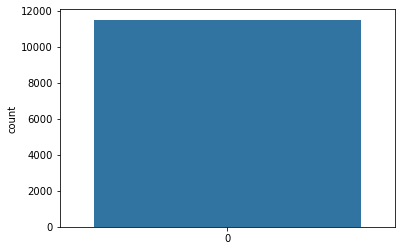

In [54]:
cols = ESR.columns
tgt = ESR.y
tgt[tgt>1]=0
ax = sn.countplot(tgt,label="Count")
# non_seizure, seizure = tgt.value_counts()
# print('The number of trials for the non-seizure class is:', non_seizure)
# print('The number of trials for the seizure class is:', seizure)

As we can see, there are 178 EEG features and 5 possible classes. The main goal of the dataset it's to be able to correctly identify epileptic seizures from EEG data, so a binary classification between classes of label 1 and the rest (2,3,4,5). In order to train our model, let's define our independent variables (X) and our dependent variable (y).

#  &#128223; Data Pre-processing

## What is Data Pre-pocessing?
![Imgur](https://i.imgur.com/HyPUqwF.png)
Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues. Data preprocessing prepares raw data for further processing.
![Imgur](https://i.imgur.com/VuYZfho.jpg)

## &#128223; 1. Checking Missing Data

In [55]:
ESR.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

###  &#128210; Note:
Thats great here is no missing value. So we can work very smoothly.

# &#128203; Exploratory Data Analysis

In [56]:
ESR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [70]:
ESR['y'].value_counts()

0    9200
1    2300
Name: y, dtype: int64

In [57]:
ESR.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,0.200000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,0.400017
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,0.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,0.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,0.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,0.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,1.000000


In [58]:
X = ESR.iloc[:,1:179].values
X.shape

(11500, 178)

Text(0.5, 0, 'Samples')

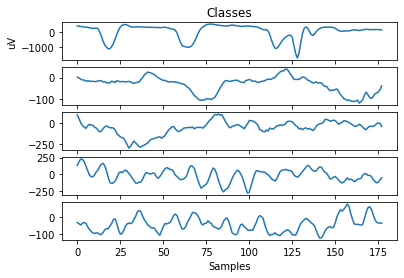

In [59]:
plt.subplot(511)
plt.plot(X[1,:])
plt.title('Classes')
plt.ylabel('uV')
plt.subplot(512)
plt.plot(X[7,:])
plt.subplot(513)
plt.plot(X[12,:])
plt.subplot(514)
plt.plot(X[0,:])
plt.subplot(515)
plt.plot(X[2,:])
plt.xlabel('Samples')

In [60]:
y = ESR.iloc[:,179].values
y

array([0, 1, 0, ..., 0, 0, 0])

To make this a binary problem, let's turn the non-seizure classes 0 while maintaining the seizure as 1.

In [61]:
# y[y>1]=0
y

array([0, 1, 0, ..., 0, 0, 0])

# &#128295; Building Machine Learning Models

##  Splitting the Dataset into the Training set and Test set


In [62]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Feature Scaling

In [63]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# 1. Logistic Regression
![Imgur](https://i.imgur.com/HyPUqwF.png)
Logistic regression, or logit regression, or logit model is a regression model where the dependent variable (DV) is categorical. This article covers the case of a binary dependent variable—that is, where it can take only two values, "0" and "1", which represent outcomes such as pass/fail, win/lose, alive/dead or healthy/sick. Cases where the dependent variable has more than two outcome categories may be analysed in multinomial logistic regression, or, if the multiple categories are ordered, in ordinal logistic regression.

In [64]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_log_reg) + ' %')

67.0 %


/Users/hraghu/opt/anaconda3/envs/courses/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 2.Support Vector Machine (SVM)
![Imgur](https://i.imgur.com/HyPUqwF.png)
Support Vector Machine (SVM) model is a Supervised Learning model used for classification and regression analysis. It is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using what is called the kernel trick, implicitly mapping their inputs into high-dimensional feature spaces. Suppose some given data points each belong to one of two classes, and the goal is to decide which class a new data point will be in. In the case of support vector machines, a data point is viewed as a  p -dimensional vector (a list of  p  numbers), and we want to know whether we can separate such points with a  (p−1) -dimensional hyperplane.

When data are not labeled, supervised learning is not possible, and an unsupervised learning approach is required, which attempts to find natural clustering of the data to groups, and then map new data to these formed groups. The clustering algorithm which provides an improvement to the support vector machines is called support vector clustering and is often used in industrial applications either when data are not labeled or when only some data are labeled as a preprocessing for a classification pass.

In the below code, SVC stands for Support Vector Classification.

In [65]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_svc) + '%')

98.26%


# Linear SVM

In [66]:
from sklearn.svm import SVC, LinearSVC
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)
print ("Acc="+ str(acc_linear_svc) + '%')

Acc=84.75%


/Users/hraghu/opt/anaconda3/envs/courses/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# 3.*k*-Nearest Neighbors
![Imgur](https://i.imgur.com/HyPUqwF.png)
*k* -nearest neighbors algorithm (k-NN) is one of the simplest machine learning algorithms and is used for classification and regression. In both cases, the input consists of the  k  closest training examples in the feature space. The output depends on whether  k -NN is used for classification or regression:

* In  k -NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its  k  nearest neighbors ( k  is a positive integer, typically small). If  k=1 , then the object is simply assigned to the class of that single nearest neighbor.

* In  k -NN regression, the output is the property value for the object. This value is the average of the values of its  k nearest neighbors.

In [67]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_knn)+'%')

/Users/hraghu/opt/anaconda3/envs/courses/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


94.02%


/Users/hraghu/opt/anaconda3/envs/courses/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# 4. Gaussian Naive Bayes
![Imgur](https://i.imgur.com/HyPUqwF.png)
Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

Bayes' theorem (alternatively Bayes' law or Bayes' rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. For example, if cancer is related to age, then, using Bayes' theorem, a person's age can be used to more accurately assess the probability that they have cancer, compared to the assessment of the probability of cancer made without knowledge of the person's age.

Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. It is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable. For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.

In [68]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred_gnb = clf.predict(X_test)
acc_gnb = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_gnb) + '%')

95.84%


# 5. Artificial Neural Networks(ANN)
![Imgur](https://i.imgur.com/HyPUqwF.png)
Computers are great at solving algorithmic and math problems, but often the world can't easily be defined with a mathematical algorithm. Facial recognition and language processing are a couple of examples of problems that can't easily be quantified into an algorithm, however these tasks are trivial to humans. The key to Artificial Neural Networks is that their design enables them to process information in a similar way to our own biological brains, by drawing inspiration from how our own nervous system functions. This makes them useful tools for solving problems like facial recognition, which our biological brains can do easily.

## Modeling Artificial Neurons
Artificial neuron models are at their core simplified models based on biological neurons. This allows them to capture the essence of how a biological neuron functions. We usually refer to these artificial neurons as 'perceptrons'. So now lets take a look at what a perceptron looks like.
![Imgur](https://i.imgur.com/uvMRQ6R.jpg)
As shown in the diagram above a typical perceptron will have many inputs and these inputs are all individually weighted. The perceptron weights can either amplify or deamplify the original input signal. For example, if the input is 1 and the input's weight is 0.2 the input will be decreased to 0.2. These weighted signals are then added together and passed into the activation function. The activation function is used to convert the input into a more useful output. There are many different types of activation function but one of the simplest would be step function. A step function will typically output a 1 if the input is higher than a certain threshold, otherwise it's output will be 0.

In [19]:
#Importing keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

: 

: 

## Implementing Artificial Neural Networks
So now you're probably wondering what an artificial neural network looks like and how it uses these artificial neurons to process information. In this tutorial we're going to be looking at feedforward networks and how their design links our perceptron together creating a functioning artificial neural network. Before we begin lets take a look at what a basic feedforward network looks like:
![Imgur](https://i.imgur.com/la4Rwn6.jpg)
Each input from the input layer is fed up to each node in the hidden layer, and from there to each node on the output layer. We should note that there can be any number of nodes per layer and there are usually multiple hidden layers to pass through before ultimately reaching the output layer. Choosing the right number of nodes and layers is important later on when optimising the neural network to work well a given problem. As you can probably tell from the diagram, it's called a feedforward network because of how the signals are passed through the layers of the neural network in a single direction. These aren't the only type of neural network though. There are also feedback networks where its architecture allows signals to travel in both directions.

### Initializing the ANN

In [21]:
classifier = Sequential()

### Adding input layer and first hidden layer

In [22]:
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu', input_dim = 178))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=178, units=80, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


### Adding second hidden layer

In [23]:
classifier.add(Dense(output_dim = 80, init = 'uniform', activation = 'relu'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=80, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


### Adding the output layer

In [24]:
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  """Entry point for launching an IPython kernel.


### Compiling the ANN

In [25]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#Fitting the ANN to the training set
classifier.fit(X_train, y_train, batch_size = 10, nb_epoch = 100)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/100
9200/9200 [==============================] - 6s 629us/step - loss: 0.1890 - acc: 0.9516
Epoch 2/100
9200/9200 [==============================] - 2s 262us/step - loss: 0.0893 - acc: 0.9699
Epoch 3/100
9200/9200 [==============================] - 2s 259us/step - loss: 0.0682 - acc: 0.9775
Epoch 4/100
9200/9200 [==============================] - 2s 252us/step - loss: 0.0638 - acc: 0.9778
Epoch 5/100
9200/9200 [==============================] - 2s 251us/step - loss: 0.0573 - acc: 0.9790
Epoch 6/100
9200/9200 [==============================] - 3s 275us/step - loss: 0.0465 - acc: 0.9851
Epoch 7/100
9200/9200 [==============================] - 3s 274us/step - loss: 0.0438 - acc: 0.9829
Epoch 8/100
9200/9200 [==============================] - 3s 303us/step - loss: 0.0395 - acc: 0.9855
Epoch 9/100
9200/9200 [==============================] - 2s 255us/step - loss: 0.0369 - acc: 0.9872
Epoch 10/100
9200/9200 [==============================] - 3s 290us/step - loss: 0.0395 - acc: 0.9878

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
acc_ANN = round(clf.score(X_train, y_train) * 100, 2)
print (str(acc_ANN) + '%')

95.79%


# Principal Component Analysis (PCA)
![Imgur](https://i.imgur.com/HyPUqwF.png)
Principal	Component	Analysis	(PCA)is a dimension-reduction tool that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set.

How does PCA work -

1. Calculate the covariance matrix X of data points.
2. Calculate eigen vectors and corresponding eigen values.
3. Sort the eigen vectors according to their eigen values in decreasing order.
4. Choose first k eigen vectors and that will be the new k dimensions.
5. Transform the original n dimensional data points into k dimensions.

In [27]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
acc_PCA = round(pca.score(X_train, y_train) )
print (str(acc_PCA) + '%')

90.0%


# Comparing Models

In [28]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines','ANN', 
              'KNN', 'Naive Bayes', 'Principal Component Analysis'],
    
    'Score': [acc_log_reg, acc_svc,acc_ANN , 
              acc_knn, acc_gnb,acc_PCA ]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Support Vector Machines,98.33
2,ANN,95.79
4,Naive Bayes,95.79
3,KNN,93.62
5,Principal Component Analysis,90.00
0,Logistic Regression,82.25


# Conclusion
The aim of this study is to detect epileptic seizure using two different feature ex-traction methods and comparison performance of various machine learning algorithms.

**EEG EPILIPTIC : FINISH**